<a href="https://colab.research.google.com/github/Lavan1999/Supply-Chain-Logistics-Problem/blob/main/Supply_Chain_Logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supply Chanin Logistics**

# Libraries

In [1]:
import pandas as pd
import numpy as np


# Data Collection

In [2]:
# Access each sheet by its name and store it in separate DataFrames
order_list_df = pd.read_csv(r'/content/Supply chain logisitcs problem.xlsx - OrderList.csv')
freight_rates_df = pd.read_csv(r'/content/Supply chain logisitcs problem.xlsx - FreightRates.csv')
plant_ports_df = pd.read_csv(r'/content/Supply chain logisitcs problem.xlsx - PlantPorts.csv')
products_per_plant_df = pd.read_csv(r'/content/Supply chain logisitcs problem.xlsx - ProductsPerPlant.csv')
vmi_customers_df = pd.read_csv(r'/content/Supply chain logisitcs problem.xlsx - VmiCustomers.csv')
wh_capacities_df = pd.read_csv(r'/content/Supply chain logisitcs problem.xlsx - WhCapacities.csv')
wh_costs_df = pd.read_csv(r'/content/Supply chain logisitcs problem.xlsx - WhCosts.csv')

# Display the first few rows of each DataFrame
print("OrderList:")
print(order_list_df.head())

print("\nFreightRates:")
print(freight_rates_df.head())

print("\nPlantPorts:")
print(plant_ports_df.head())

print("\nProductsPerPlant:")
print(products_per_plant_df.head())

print("\nVmiCustomers:")
print(vmi_customers_df.head())

print("\nWhCapacities:")
print(wh_capacities_df.head())

print("\nWhCosts:")
print(wh_costs_df.head())

OrderList:
     Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1447296447  5/26/2013      PORT09   V44_3    1           CRF   
1  1447158015  5/26/2013      PORT09   V44_3    1           CRF   
2  1447138899  5/26/2013      PORT09   V44_3    1           CRF   
3  1447363528  5/26/2013      PORT09   V44_3    1           CRF   
4  1447363981  5/26/2013      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   87

# EDA - Exploratory Data Analysis

In [3]:
# Explore the structure of each DataFrame
dataframes = {
    "OrderList": order_list_df,
    "FreightRates": freight_rates_df,
    "WarehouseCosts": wh_costs_df,
    "WarehouseCapacities": wh_capacities_df,
    "ProductsPerPlant": products_per_plant_df,
    "VMICustomers": vmi_customers_df,
    "PlantPorts": plant_ports_df
}

# Print data types and check for missing values
for name, df in dataframes.items():
    print(f"{name} - Data Types:")
    print(df.dtypes)
    print(f"\n{name} - Missing Values:")
    print(df.isnull().sum())
    print("\n")

# Summarize key statistics for numerical columns
for name, df in dataframes.items():
    if not df.select_dtypes(include=[np.number]).empty:
        print(f"{name} - Statistics for Numerical Data:")
        print(df.select_dtypes(include=[np.number]).describe())
        print("\n")

# Summarize key statistics for categorical columns
for name, df in dataframes.items():
    if not df.select_dtypes(include=['object']).empty:
        print(f"{name} - Statistics for Categorical Data:")
        print(df.select_dtypes(include=['object']).describe())
        print("\n")

OrderList - Data Types:
Order ID                  int64
Order Date               object
Origin Port              object
Carrier                  object
TPT                       int64
Service Level            object
Ship ahead day count      int64
Ship Late Day count       int64
Customer                 object
Product ID                int64
Plant Code               object
Destination Port         object
Unit quantity             int64
Weight                  float64
dtype: object

OrderList - Missing Values:
Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64


FreightRates - Data Types:
Carrier          object
orig_port_cd     object
dest_port_cd     object
minm_wg

# Analysis Tasks

## 1.Historical Cost Calculation

In [4]:
# Merging the datasets on 'Plant Code' and 'WH'
merged = pd.merge(order_list_df, wh_costs_df, left_on='Plant Code', right_on='WH')
merged.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,WH,Cost/unit
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30,PLANT16,1.92
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94,PLANT16,1.92
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20,PLANT16,1.92
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16,PLANT16,1.92
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34,PLANT16,1.92


In [5]:
# Calculating historical cost
merged['Total Cost'] = merged['Unit quantity'] * merged['Cost/unit']
total_historical_cost = merged['Total Cost'].sum()

In [6]:
print(total_historical_cost)

15704718.23


## 2. Capacity Utilization

In [8]:
# Merging the datasets on 'Plant Code' from order_list_df and 'Plant ID' from WHCapacities_df
merged_df = pd.merge(order_list_df, wh_capacities_df, left_on='Plant Code', right_on='Plant ID')
merged_df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,Plant ID,Daily Capacity
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30,PLANT16,457
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94,PLANT16,457
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20,PLANT16,457
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16,PLANT16,457
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34,PLANT16,457


In [9]:
# Calculating the total number of orders handled by each plant
orders_per_plant = merged_df.groupby('Plant Code').size().reset_index(name='Total Orders')
orders_per_plant

,Plant Code,Total Orders
0,PLANT03,8541
1,PLANT04,1
2,PLANT08,102
3,PLANT09,12
4,PLANT12,300
5,PLANT13,86
6,PLANT16,173


In [10]:
# Calculating the capacity utilization
orders_per_plant = pd.merge(orders_per_plant, wh_capacities_df, left_on='Plant Code', right_on='Plant ID')
orders_per_plant['Utilization (%)'] = (orders_per_plant['Total Orders'] / orders_per_plant['Daily Capacity ']) * 100

# Display the DataFrame with utilization
print(orders_per_plant[['Plant Code', 'Total Orders', 'Daily Capacity ', 'Utilization (%)']])

  Plant Code  Total Orders  Daily Capacity   Utilization (%)
0    PLANT03          8541             1013       843.139191
1    PLANT04             1              554         0.180505
2    PLANT08           102               14       728.571429
3    PLANT09            12               11       109.090909
4    PLANT12           300              209       143.540670
5    PLANT13            86              490        17.551020
6    PLANT16           173              457        37.855580


## 3. Freight Cost Analysis

In [11]:
# Cleaning data: Remove any unwanted characters and convert to numeric
freight_rates = freight_rates_df.copy()
freight_rates['minimum cost'] = freight_rates['minimum cost'].replace('[\$,]', '', regex=True).astype(float)
freight_rates['rate'] = freight_rates['rate'].replace('[\$,]', '', regex=True).astype(float)

# Ensuring weight columns are numeric
freight_rates['minm_wgh_qty'] = pd.to_numeric(freight_rates['minm_wgh_qty'], errors='coerce')
freight_rates['max_wgh_qty'] = pd.to_numeric(freight_rates['max_wgh_qty'], errors='coerce')
freight_rates.head()

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.23,0.71,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.23,0.75,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.23,0.79,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.23,0.83,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.23,1.06,AIR,2,V88888888_0


In [12]:
# Ensuring order_list_df weight column is numeric
order_list_df['Weight'] = pd.to_numeric(order_list_df['Weight'], errors='coerce')

# Merging datasets to get freight costs
merged_freight = pd.merge(order_list_df, freight_rates,
                         left_on=['Origin Port', 'Destination Port', 'Weight'],
                         right_on=['orig_port_cd', 'dest_port_cd', 'minm_wgh_qty'], how='left')
merged_freight.head()

,Order ID,Order Date,Origin Port,Carrier_x,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,...,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Function to calculate freight cost based on weight and rates
def calculate_freight_cost(row):
    if pd.isna(row['Weight']):
        return None  # Handle cases where weight is not valid
    if row['Weight'] < row['minm_wgh_qty']:
        return row['minimum cost']
    elif row['Weight'] <= row['max_wgh_qty']:
        return row['minimum cost'] + (row['Weight'] - row['minm_wgh_qty']) * row['rate']
    else:
        # If weight exceeds the maximum range, you can decide how to handle it
        return None

# Apply the function to calculate freight cost
merged_freight['Freight Cost'] = merged_freight.apply(calculate_freight_cost, axis=1)

In [15]:
merged_freight.head()

,Order ID,Order Date,Origin Port,Carrier_x,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,...,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type,Freight Cost
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Calculating total freight cost
total_freight_cost = merged_freight['Freight Cost'].sum()

print(f"Total Freight Cost: ${total_freight_cost:.2f}")

Total Freight Cost: $244.86


## 4. Optimizing Model

In [17]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 52.4 MB/s eta 0:00:00


In [18]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value


LpProblem: Defines an optimization problem in PuLP, specifying its name and objective (minimization or maximization).

LpMinimize: Indicates that the objective function of the LP problem is to be minimized.

LpVariable: Creates decision variables for the optimization problem, which can be continuous, integer, or binary.

lpSum: A function to compute the sum of a list of linear expressions or variables, often used in the objective function and constraints.

LpStatus: Provides the status of the optimization solution, indicating whether the solution is optimal, infeasible, or unbounded.

value: Retrieves the numerical value of the objective function or a variable in the solved LP problem.

In [20]:
# Extracting data from DataFrames
warehouses = wh_capacities_df['Plant ID'].tolist()
customers = vmi_customers_df['Customers'].unique().tolist()
products = products_per_plant_df['Product ID'].unique().tolist()

# Creating dictionaries for capacity, cost, availability, and demand
capacity = wh_capacities_df.set_index('Plant ID')['Daily Capacity '].to_dict()
wh_costs = wh_costs_df.set_index('WH')['Cost/unit'].to_dict()
availability = products_per_plant_df.groupby('Plant Code')['Product ID'].apply(list).to_dict()

# Freight rates: map warehouse-customer-product combinations
freight_rates = freight_rates_df.set_index(['Carrier', 'orig_port_cd', 'dest_port_cd'])['rate'].to_dict()

# Order list: extract demand for each customer
order_demand = order_list_df.groupby('Customer')['Unit quantity'].sum().to_dict()

In [22]:
order_demand

{'V555555555555555555_17': 266457,
 'V555555555555555555_42': 470632,
 'V555555555555555555_45': 116136,
 'V555555555555555555_46': 12080,
 'V555555555555555_23': 375,
 'V555555555555555_29': 1054980,
 'V555555555555555_44': 15125,
 'V55555555555555_8': 877824,
 'V5555555555555_16': 3434,
 'V555555555555_31': 435868,
 'V55555555555_28': 5293676,
 'V5555555555_1': 6441,
 'V555555555_14': 817338,
 'V555555555_27': 700796,
 'V555555555_3': 75171,
 'V555555555_35': 4512,
 'V55555555_0': 64298,
 'V55555555_32': 1914858,
 'V55555555_5': 8020417,
 'V55555555_7': 927068,
 'V55555555_9': 5091,
 'V5555555_12': 84110,
 'V5555555_19': 221362,
 'V5555555_22': 580326,
 'V5555555_30': 299830,
 'V555555_11': 6030,
 'V555555_24': 96177,
 'V555555_34': 6411,
 'V555555_40': 13072,
 'V555555_6': 1220461,
 'V55555_10': 6512,
 'V55555_2': 1512452,
 'V55555_26': 1909058,
 'V55555_4': 412940,
 'V55555_53': 232681,
 'V5555_20': 56705,
 'V5555_25': 48045,
 'V5555_33': 241796,
 'V5555_36': 931678,
 'V5555_38': 5

Task 4: Optimization Model Workflow
Problem Initialization
Problem Definition:

I defined the objective of the optimization problem as minimizing total costs, which includes both storage and freight costs.
Decision Variables:

I created decision variables to represent the quantities of products shipped from each warehouse to each customer.
Objective Function:

I formulated the objective function to minimize total costs. This function accounts for:
Storage costs associated with holding inventory in warehouses.
Freight costs for shipping products from warehouses to customers.
Constraints:

I established several constraints to ensure the feasibility and practicality of the solution:
Customer Demand Fulfillment: Ensured that the total products shipped to each customer met or exceeded their demand.
Warehouse Capacity Limits: Ensured that the total products shipped from each warehouse did not exceed its capacity.
Product Availability: Ensured that only available products were shipped from each warehouse.
Solving the LP Problem:

I utilized a linear programming solver to find the optimal solution. The solver determined the optimal quantities to ship from each warehouse to each customer, minimizing total costs while satisfying all constraints.
Result Analysis:

I examined the solution provided by the solver, which included the status of the optimization, the values of the decision variables, and the total minimized cost.
This workflow ensured that the solution was both cost-effective and feasible, adhering to all specified constraints and objectives.

In [23]:
# Initialize the LP problem
prob = LpProblem("Order_Routing_Optimization", LpMinimize)

# Defining decision variables
x = LpVariable.dicts("ship", (warehouses, customers, products), lowBound=0, cat='Continuous')

# Defining the objective function: Minimize total cost (storage + freight)
prob += lpSum([wh_costs[i] * x[i][j][p] for i in warehouses for j in customers for p in products]) + \
        lpSum([freight_rates[(i, j, k)] * x[i][j][k] for i in warehouses for j in customers for k in products if (i, j, k) in freight_rates])

# Constraints
# 1. Fulfill customer demand
for j in customers:
    prob += lpSum([x[i][j][p] for i in warehouses for p in products]) >= order_demand.get(j, 0)

# 2. Warehouse capacity
for i in warehouses:
    prob += lpSum([x[i][j][p] for j in customers for p in products]) <= capacity[i]

# 3. Product availability
for i in warehouses:
    for p in products:
        if p not in availability.get(i, []):
            prob += lpSum([x[i][j][p] for j in customers]) == 0

# Solving the problem
prob.solve()

# Print the results
print(f"Status: {prob.status}, {LpStatus[prob.status]}")
for v in prob.variables():
    if v.varValue > 0:
        print(f"{v.name} = {v.varValue}")

# Objective value
print(f"Total Cost = {value(prob.objective)}")


Status: -1, Infeasible
ship_PLANT01_V55555555_5_1676003 = 1070.0
ship_PLANT02_V55555555_5_1682736 = 138.0
ship_PLANT03_V55555555_5_1620510 = 1013.0
ship_PLANT04_V55555555_5_1680682 = 554.0
ship_PLANT05_V55555555_5_1660748 = 385.0
ship_PLANT06_V55555555_5_1687643 = 49.0
ship_PLANT07_V55555555_5_1681885 = 265.0
ship_PLANT08_V55555555_5_1696254 = 14.0
ship_PLANT09_V55555555_5_1695687 = 11.0
ship_PLANT10_V55555555_5_1683294 = 118.0
ship_PLANT11_V55555555_5_1684768 = 332.0
ship_PLANT12_V55555555_5_1637055 = 209.0
ship_PLANT13_V55555555_5_1669740 = 490.0
ship_PLANT14_V55555555_5_1700693 = 549.0
ship_PLANT15_V55555555_5_1698815 = 11.0
ship_PLANT16_V55555555_5_1677350 = 457.0
ship_PLANT17_V55555555_5_1685369 = 8.0
ship_PLANT18_V55555555_5_1660883 = 8014737.0
ship_PLANT19_V55555555_5_1660152 = 7.0
Total Cost = 16353712.520000001


## 5. Scenario Analysis:


Scenario 1: Increase warehouse capacities by 20%.

Scenario 2: Decrease freight rates by 10%.

Scenario 3: Adjust product compatibility by adding or removing products

In [25]:
def increase_capacity(capacity_df, factor):
    capacity_df['Daily Capacity '] *= factor
    return capacity_df.set_index('Plant ID')['Daily Capacity '].to_dict()

# Apply scenario: Increase capacity by 20%
increased_capacity = increase_capacity(wh_capacities_df.copy(), 1.2)
increased_capacity

{'PLANT15': 13.2,
 'PLANT17': 9.6,
 'PLANT18': 133.2,
 'PLANT05': 462.0,
 'PLANT02': 165.6,
 'PLANT01': 1284.0,
 'PLANT06': 58.8,
 'PLANT10': 141.6,
 'PLANT07': 318.0,
 'PLANT14': 658.8,
 'PLANT16': 548.4,
 'PLANT12': 250.79999999999998,
 'PLANT11': 398.4,
 'PLANT09': 13.2,
 'PLANT03': 1215.6,
 'PLANT13': 588.0,
 'PLANT19': 8.4,
 'PLANT08': 16.8,
 'PLANT04': 664.8}

In [26]:
def decrease_freight_rates(freight_rates_df, factor):
    freight_rates_df['rate'] = freight_rates_df['rate'].replace({'\$': ''}, regex=True).astype(float) * factor
    return freight_rates_df.set_index(['Carrier', 'orig_port_cd', 'dest_port_cd'])['rate'].to_dict()

# Apply scenario: Decrease freight rates by 10%
decreased_freight_rates = decrease_freight_rates(freight_rates_df.copy(), 0.9)
decreased_freight_rates

{('V444_6', 'PORT08', 'PORT09'): 1.431,
 ('V444_6', 'PORT10', 'PORT09'): 1.431,
 ('V444_8', 'PORT09', 'PORT09'): 0.054,
 ('V444_8', 'PORT11', 'PORT09'): 0.18000000000000002,
 ('V444_8', 'PORT04', 'PORT09'): 0.162,
 ('V444_9', 'PORT08', 'PORT09'): 0.09000000000000001,
 ('V444_8', 'PORT02', 'PORT09'): 0.108,
 ('V444_8', 'PORT03', 'PORT09'): 0.369,
 ('V444_2', 'PORT11', 'PORT09'): 0.09000000000000001,
 ('V444_2', 'PORT07', 'PORT09'): 0.18000000000000002,
 ('V444_2', 'PORT08', 'PORT09'): 0.135,
 ('V444_2', 'PORT10', 'PORT09'): 0.135,
 ('V444_1', 'PORT10', 'PORT09'): 0.09000000000000001,
 ('V444_0', 'PORT02', 'PORT09'): 0.09000000000000001,
 ('V444_5', 'PORT05', 'PORT09'): 0.081,
 ('V444_5', 'PORT06', 'PORT09'): 0.25200000000000006,
 ('V444_0', 'PORT04', 'PORT09'): 0.045000000000000005,
 ('V444_2', 'PORT02', 'PORT09'): 0.07200000000000001,
 ('V444_5', 'PORT02', 'PORT09'): 0.07200000000000001,
 ('V444_4', 'PORT10', 'PORT09'): 0.108,
 ('V444_1', 'PORT06', 'PORT09'): 0.081,
 ('V444_4', 'PORT06

In [27]:
def adjust_product_compatibility(products_per_plant_df, added_products, removed_products):
    # Create modified availability dictionary
    modified_availability = products_per_plant_df.groupby('Plant Code')['Product ID'].apply(set).to_dict()
    for plant in modified_availability:
        modified_availability[plant] = (modified_availability[plant] - set(removed_products)) | set(added_products)
    return modified_availability

# Apply scenario: Add product 999999 to all warehouses, remove product 100000
adjusted_availability = adjust_product_compatibility(products_per_plant_df.copy(), [999999], [100000])
adjusted_availability

{'CND9': {999999, 1698759},
 'PLANT01': {999999,
  1654431,
  1664406,
  1664416,
  1665542,
  1665863,
  1668786,
  1668787,
  1669095,
  1669096,
  1669098,
  1670651,
  1670657,
  1670726,
  1670729,
  1670832,
  1671082,
  1671768,
  1672483,
  1673316,
  1673317,
  1673344,
  1673352,
  1673354,
  1673604,
  1673716,
  1673790,
  1673860,
  1674378,
  1674380,
  1674382,
  1674384,
  1674493,
  1675998,
  1676003,
  1676009,
  1677163,
  1677199,
  1677614,
  1677617,
  1677618,
  1679087,
  1679938,
  1679943,
  1679944,
  1679945,
  1679946,
  1679947,
  1679948,
  1679950,
  1679951,
  1679953,
  1679954,
  1679956,
  1680434,
  1681129,
  1681136,
  1681374,
  1681378,
  1681468,
  1681812,
  1682502,
  1682593,
  1683107,
  1684271,
  1684524,
  1684756,
  1685009,
  1685010,
  1685011,
  1685012,
  1685825,
  1685828,
  1685832,
  1685834,
  1685835,
  1685836,
  1685837,
  1685841,
  1686001,
  1686002,
  1686505,
  1686705,
  1686707,
  1687195,
  1687416,
  1687417,
  168

In [30]:
def solve_lp_model(capacity_dict, freight_dict, availability_dict):
    # Initialize the LP problem
    prob = LpProblem("Order_Routing_Optimization", LpMinimize)

    # Define decision variables
    x = LpVariable.dicts("ship", (warehouses, customers, products), lowBound=0, cat='Continuous')

    # Define the objective function
    prob += lpSum([wh_costs[i] * x[i][j][p] for i in warehouses for j in customers for p in products]) + \
            lpSum([freight_dict.get((i, j, k), 0) * x[i][j][k] for i in warehouses for j in customers for k in products])

    # Constraints
    # 1. Fulfill customer demand
    for j in customers:
        prob += lpSum([x[i][j][p] for i in warehouses for p in products]) >= order_demand.get(j, 0)

    # 2. Warehouse capacity
    for i in warehouses:
        prob += lpSum([x[i][j][p] for j in customers for p in products]) <= capacity_dict.get(i, capacity[i])

    # 3. Product availability
    for i in warehouses:
        for p in products:
            if p not in availability_dict.get(i, []):
                prob += lpSum([x[i][j][p] for j in customers]) == 0

    # Solve the problem
    prob.solve()

    # Return results
    total_cost = value(prob.objective)
    return total_cost, prob.status

In [31]:
# Define scenarios
scenarios = {
    "Increase Capacity by 20%": (increased_capacity, freight_rates, availability),
    "Decrease Freight Rates by 10%": (capacity, decreased_freight_rates, availability),
    "Adjust Product Compatibility": (capacity, freight_rates, adjusted_availability)
}

# Perform scenario analysis
for scenario_name, (mod_capacity, mod_freight_rates, mod_availability) in scenarios.items():
    total_cost, status = solve_lp_model(mod_capacity, mod_freight_rates, mod_availability)
    print(f"Scenario: {scenario_name}")
    print(f"Status: {status}, Total Cost = {total_cost}\n")

Scenario: Increase Capacity by 20%
Status: -1, Total Cost = 16352124.888

Scenario: Decrease Freight Rates by 10%
Status: -1, Total Cost = 16353712.520000001

Scenario: Adjust Product Compatibility
Status: -1, Total Cost = 16353712.520000001



## 6. Visualization

<ipython-input-68-dfa5df5cf93f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Plant Code', y='Utilization', data=capacity_data, palette='viridis')


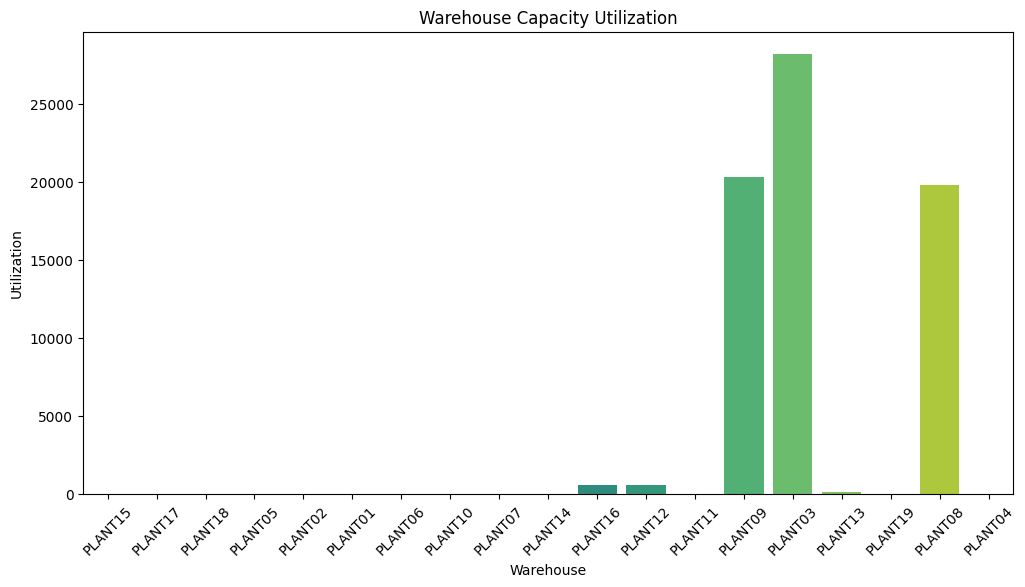

In [ ]:
wh_capacities_df = wh_capacities_df.set_index('Plant ID')
order_totals = order_list_df.groupby('Plant Code')['Unit quantity'].sum()

# Merge with warehouse capacities
capacity_data = wh_capacities_df.join(order_totals).reset_index()
capacity_data.columns = ['Plant Code', 'Daily Capacity', 'Total Orders']

# Calculate utilization
capacity_data['Utilization'] = capacity_data['Total Orders'] / capacity_data['Daily Capacity']

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Plant Code', y='Utilization', data=capacity_data, palette='viridis')
plt.xlabel('Warehouse')
plt.ylabel('Utilization')
plt.title('Warehouse Capacity Utilization')
plt.xticks(rotation=45)
plt.show()


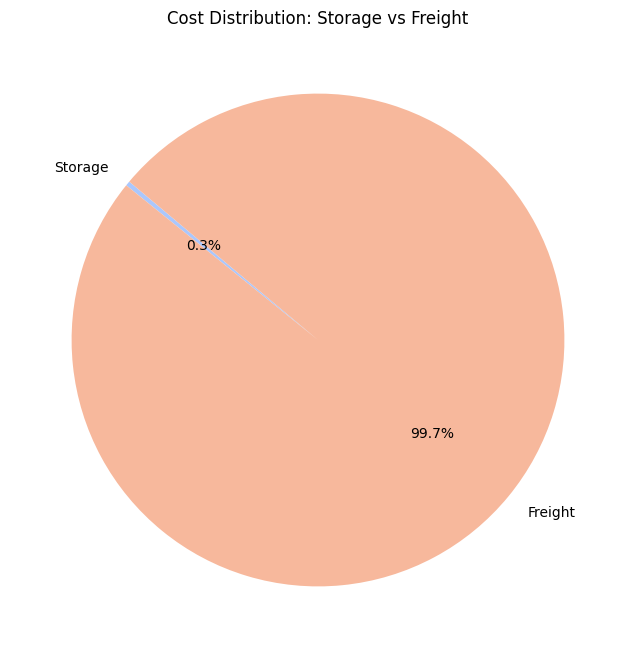

In [ ]:
# Assume 'total_storage_cost' and 'total_freight_cost' are computed
total_storage_cost = wh_costs_df['Cost/unit'].sum()  # Simplified example
total_freight_cost = freight_rates_df['rate'].replace({'\$': ''}, regex=True).astype(float).sum()

# Example data for visualization
cost_categories = ['Storage', 'Freight']
cost_values = [total_storage_cost, total_freight_cost]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(cost_values, labels=cost_categories, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(cost_categories)))
plt.title('Cost Distribution: Storage vs Freight')
plt.show()


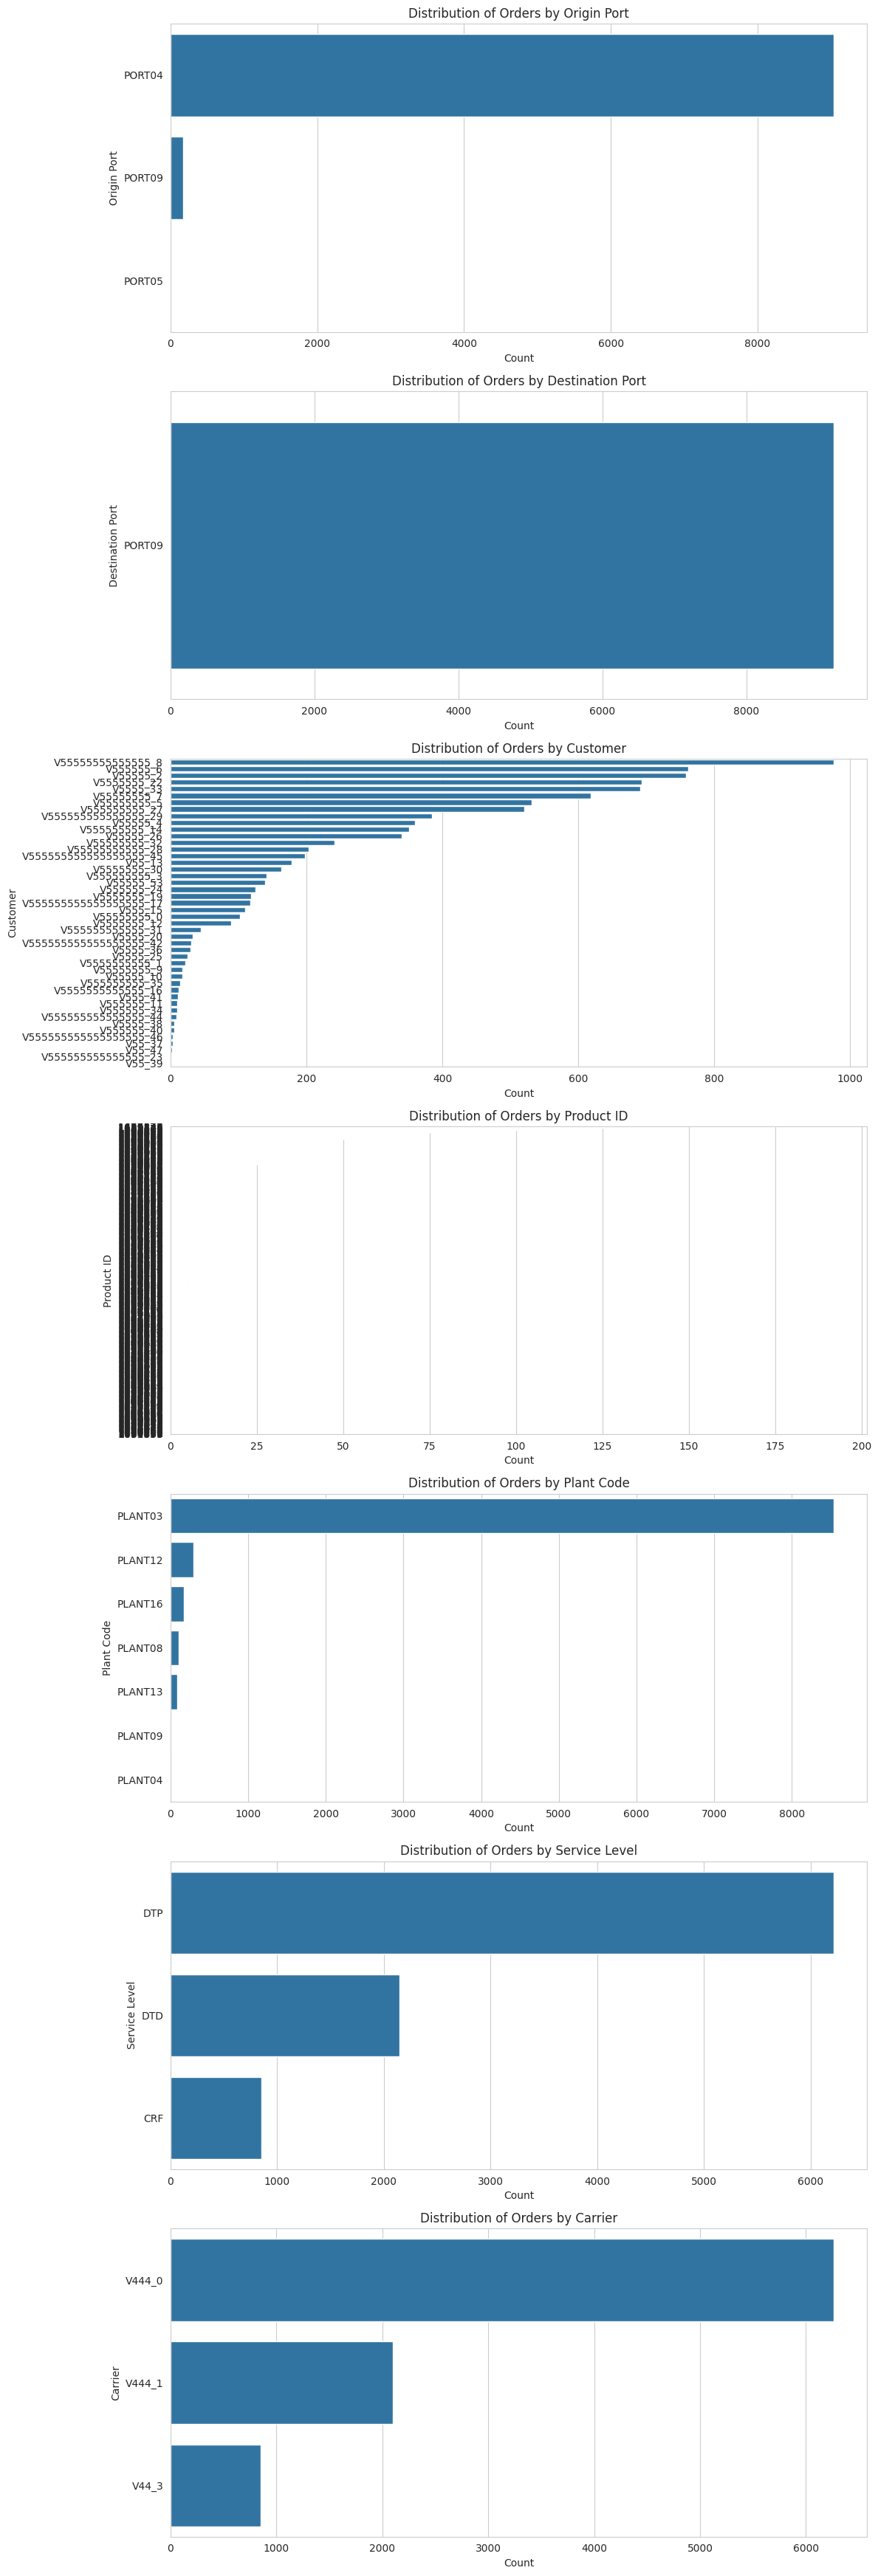

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyze the distribution of orders by various categorical features
categorical_features = ['Origin Port', 'Destination Port', 'Customer', 'Product ID', 'Plant Code', 'Service Level', 'Carrier']
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=order_list_df, y=feature, ax=axes[i], order=order_list_df[feature].value_counts().index)
    axes[i].set_title(f'Distribution of Orders by {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

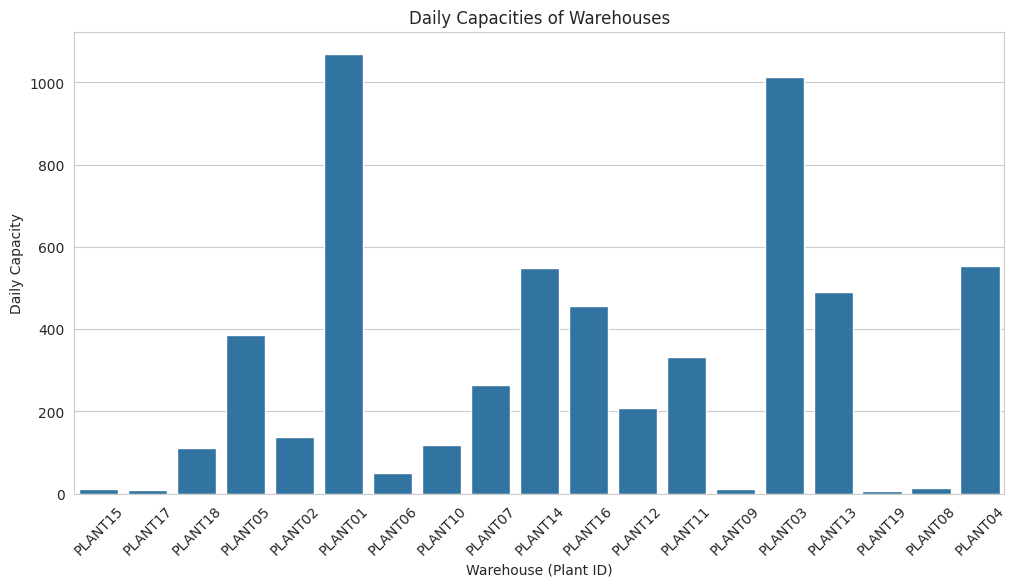

In [ ]:
# Rename column if needed
wh_capacities_df.rename(columns={'Daily Capacity ': 'Daily Capacity'}, inplace=True)

# Plotting the capacities of each warehouse
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_capacities_df, x='Plant ID', y='Daily Capacity')
plt.title('Daily Capacities of Warehouses')
plt.xlabel('Warehouse (Plant ID)')
plt.ylabel('Daily Capacity')
plt.xticks(rotation=45)
plt.show()


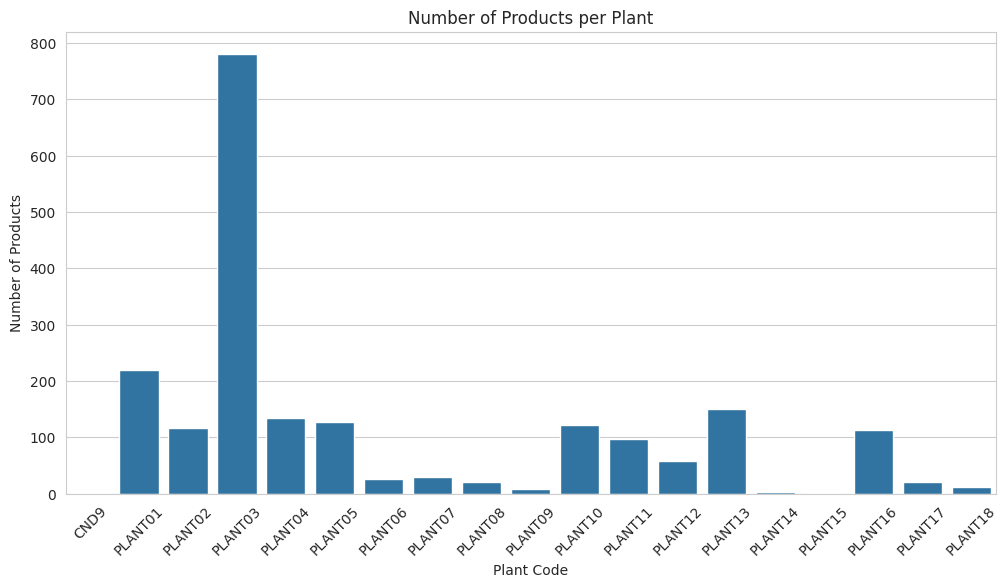

In [ ]:
# Analyzing the distribution of products per plant
plt.figure(figsize=(12, 6))
products_count_per_plant = products_per_plant_df.groupby('Plant Code').size()  # Use size to count occurrences
sns.barplot(x=products_count_per_plant.index, y=products_count_per_plant.values)
plt.title('Number of Products per Plant')
plt.xlabel('Plant Code')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()